In [14]:
import numpy as np
import pandas as pd
from subprocess import getoutput
import sys
import matplotlib.pyplot as plt
from time import gmtime, strftime, sleep

 https://www.youtube.com/watch?v=bbWkDG3vx0Q
 https://strugglers.net/~andy/blog/2019/07/11/experiments-with-rdrand-and-entropykey/

### Pobieranie entropii systemowej

In [15]:
entropy = getoutput("cat /proc/sys/kernel/random/entropy_avail")
entropy

'3860'

In [16]:
path_u_rand = '/dev/urandom'
path_rand = '/dev/random'

### Pobranie 1 bajta
**(oba źródła)**

In [17]:
data = None
with open(path_rand, "rb") as f: 
    data = f.read(1)
print('data:', data)
print('{0:08b}'.format(ord(data)))
print('size:', sys.getsizeof(data))

data: b'\x7f'
01111111
size: 34


In [18]:
data_u = None
with open(path_u_rand, "rb") as f: 
    datau = f.read(1)
print('data:', datau)
print('{0:08b}'.format(ord(datau)))
print('size:', sys.getsizeof(datau))

data: b'?'
00111111
size: 34


**Dlaczego size większy niz 8 bitów** <br>
sys.getsizeof returns the size that the object takes in memory. That includes all additional data which Python needs in order to work with the object (e.g. the information that this is a string in the first place and not an integer).

#### Wywala się bo nie ma informacji co to i nie rozumi

In [19]:
u_rand = getoutput('head -c 1 '+path_u_rand)
rand = getoutput('head -c 1 '+path_rand)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xac in position 0: invalid start byte

**Pliki wszelkie:**

In [43]:
entropia = 'entropy.txt' # mierzona entropia (co sekundę)
entropia_r = 'entropy_r.csv' # mierozna entropia przy pobieraniu po jednym bajcie z rand  (co kilka sekund bo się wywalał)
entropia_ur = 'entropy_ur.csv' # mierozna entropia przy pobieraniu po jednym bajcie z urand (co sekundę)
entropia_u_h = 'entropy_u.txt' # mierozna entropia przy pobieraniu po jednym bajcie z urand (co sekundę)
# obydwa przypadki (zapis do pliku co może powodować wzrost entropii)

In [27]:
df_entropy = pd.read_csv(entropia, sep=',')

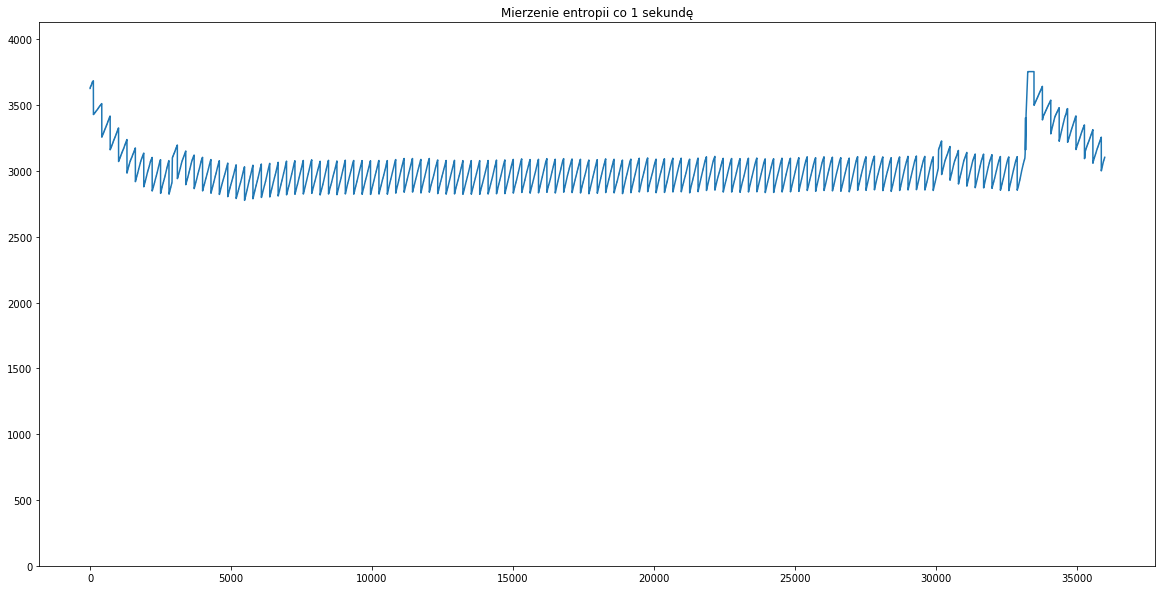

In [55]:
plt.figure(figsize=(20,10))
plt.ylim(0, max(df_entropy.entropy)*1.1)
plt.title('Mierzenie entropii co 1 sekundę')
plt.plot(df_entropy.entropy)

In [36]:
df_entropy_r = pd.read_csv(entropia_r, sep=',', header = None)

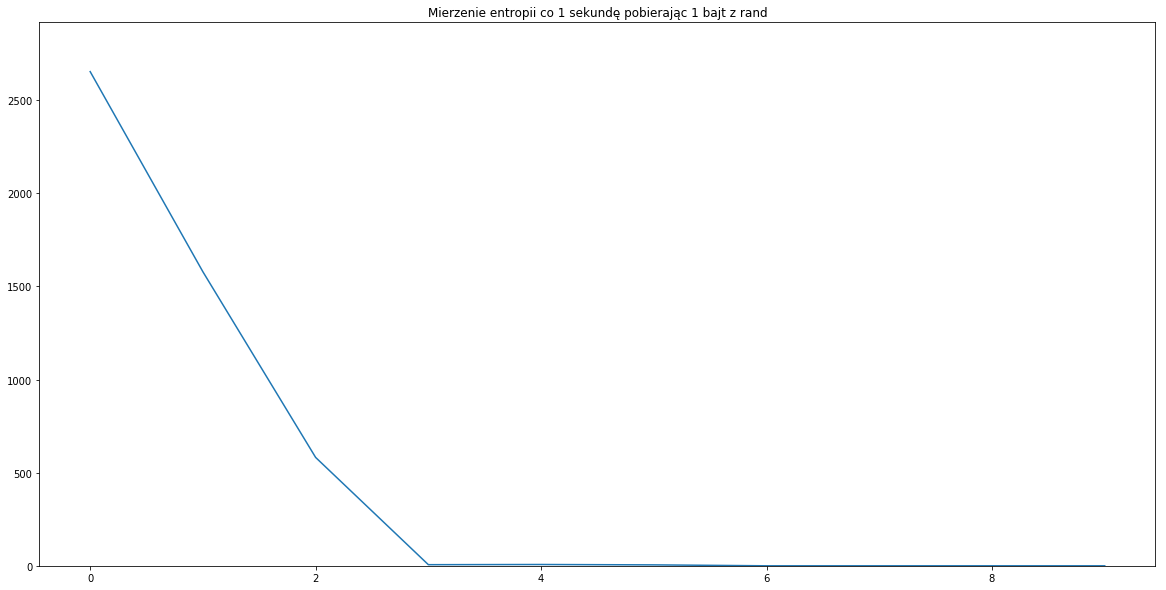

In [56]:
plt.figure(figsize=(20,10))
plt.ylim(0, max(df_entropy_r[1])*1.1)
plt.title('Mierzenie entropii co 1 sekundę pobierając 1 bajt z rand')
plt.plot(df_entropy_r[1])

In [41]:
df_entropy_ur = pd.read_csv(entropia_ur, sep=',', header = None)

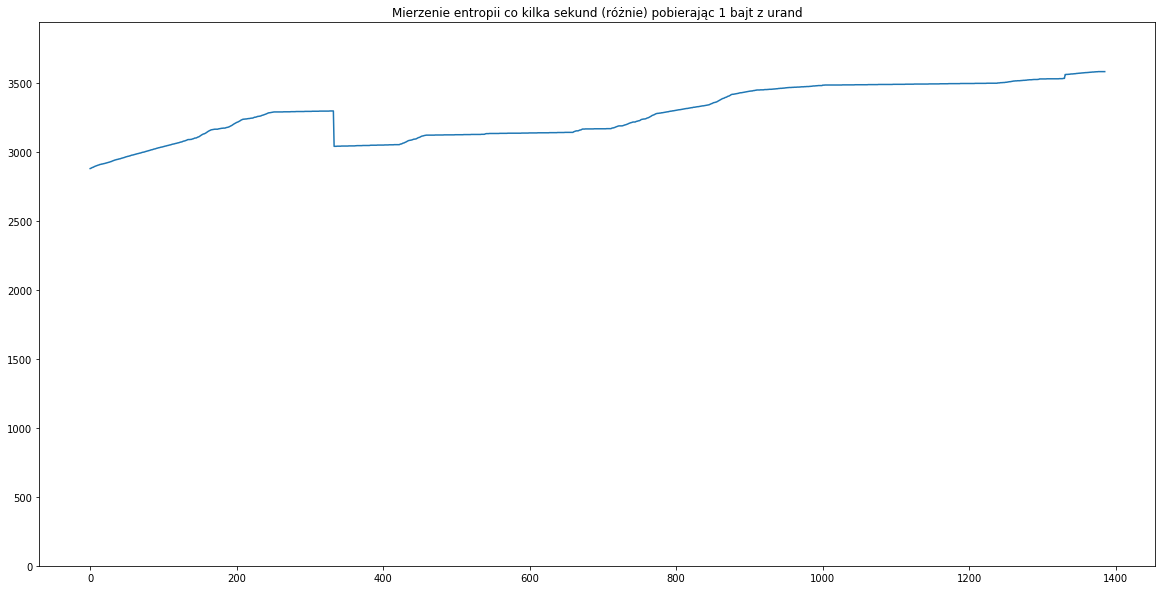

In [57]:
plt.figure(figsize=(20,10))
plt.ylim(0, max(df_entropy_ur[1])*1.1)
plt.title('Mierzenie entropii co kilka sekund (różnie) pobierając 1 bajt z urand')
plt.plot(df_entropy_ur[1])

In [52]:
df_entropy_uh = pd.read_csv(entropia_u_h, sep='  ')

/home/marek/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


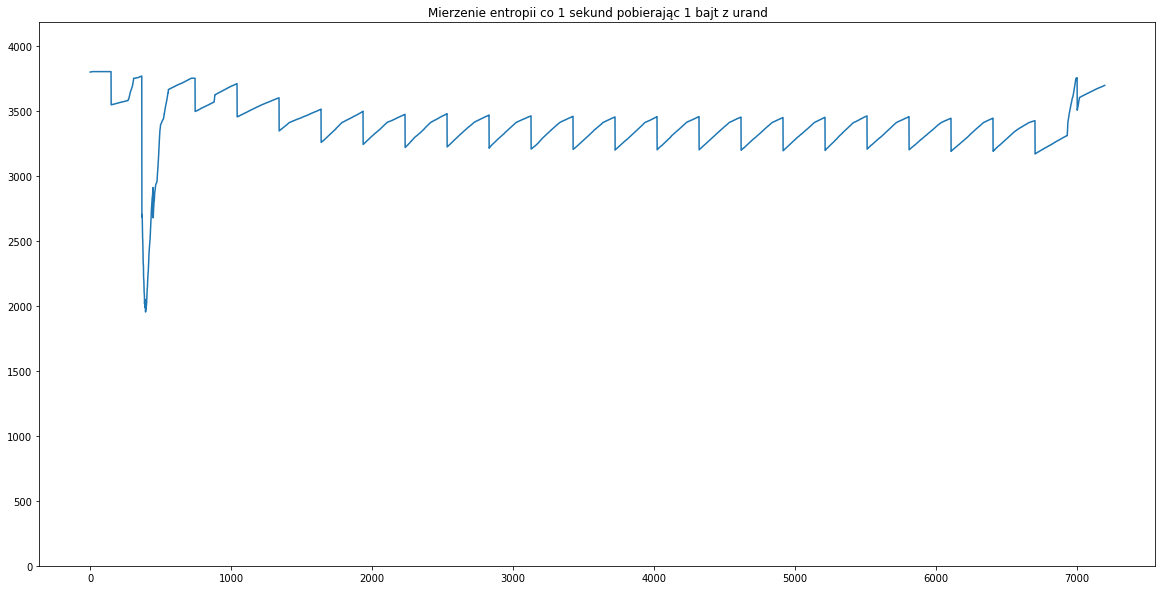

In [58]:
plt.figure(figsize=(20,10))
plt.ylim(0, max(df_entropy_uh.entropy)*1.1)
plt.title('Mierzenie entropii co 1 sekund pobierając 1 bajt z urand')
plt.plot(df_entropy_uh.entropy)